In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist      
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [3]:
print(np.shape(x_train),np.shape(y_train))

(60000, 28, 28, 1) (60000,)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
batch_size = 64  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 20
data_augmentation = False

In [6]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3),activation ='relu',input_shape=(28,28,1)))
model.add (BatchNormalization())
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add (BatchNormalization())
model.add(Conv2D(32,(5,5),strides=2,padding='same',activation='relu'))
model.add (BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3),activation ='relu'))
model.add (BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add (BatchNormalization())
model.add(Conv2D(64,(5,5),strides=2,padding='same',activation='relu'))
model.add (BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))




Instructions for updating:
Colocations handled automatically by placer.


In [8]:
opt = Adam(lr=0.0001, decay=1e-6)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 240s 4ms/step - loss: 0.8232 - accuracy: 0.7424 - val_loss: 0.1281 - val_accuracy: 0.9601
Epoch 2/20
60000/60000 [==============================] - 239s 4ms/step - loss: 0.2066 - accuracy: 0.9371 - val_loss: 0.0597 - val_accuracy: 0.9812
Epoch 3/20
60000/60000 [==============================] - 239s 4ms/step - loss: 0.1244 - accuracy: 0.9625 - val_loss: 0.0386 - val_accuracy: 0.9870
Epoch 4/20
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0909 - accuracy: 0.9733 - val_loss: 0.0326 - val_accuracy: 0.9889
Epoch 5/20
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0716 - accuracy: 0.9787 - val_loss: 0.0308 - val_accuracy: 0.9886
Epoch 6/20
60000/60000 [==============================] - 259s 4ms/step - loss: 0.0599 - accuracy: 0.9814 - val_loss: 0.0312 - val_accuracy: 0.9892
Epoch 7/20
600

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


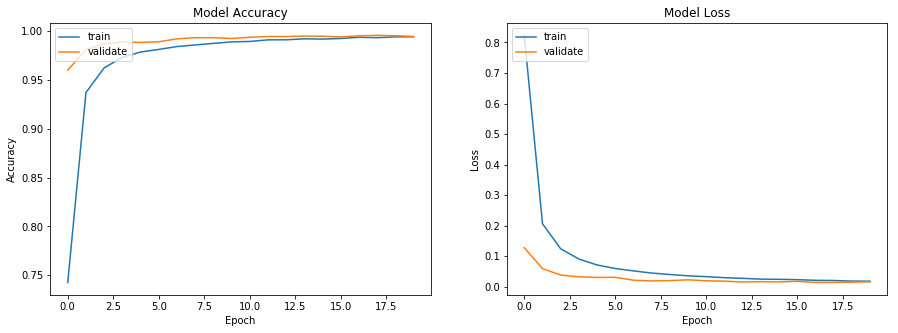

In [10]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [11]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 14s 1ms/step
Test loss: 0.016212305405119695
Test accuracy: 0.994700014591217


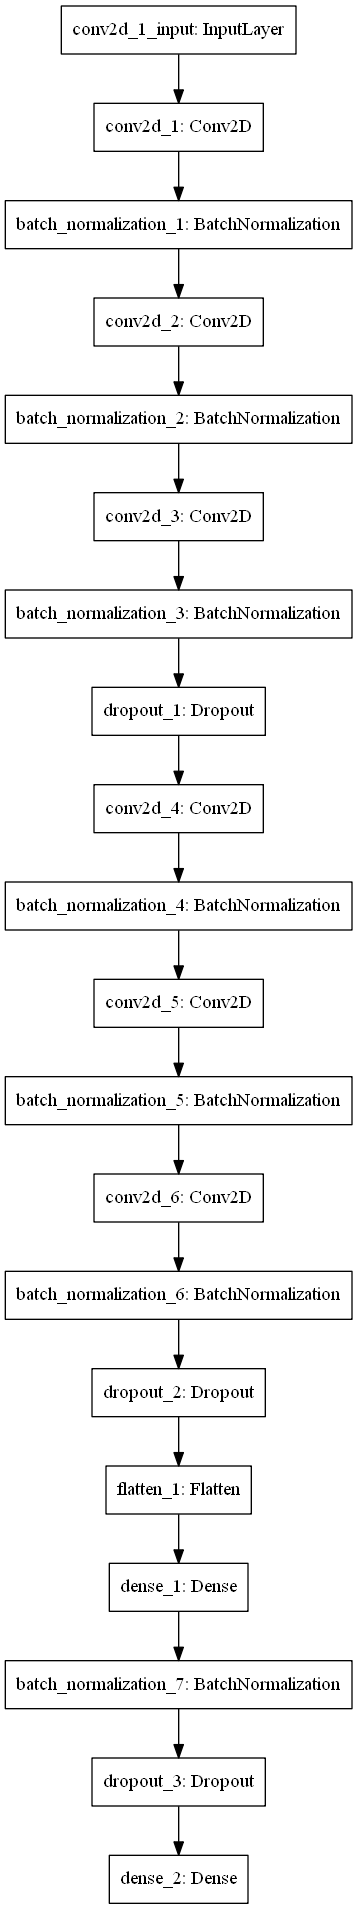

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')